# Causal Inference for The Brave and True

Code and notes from `Causal Inference for The Brave and True`: https://matheusfacure.github.io/python-causality-handbook/landing-page.html

# 01 - Introduction to Causality

In [152]:
tuition = 1000

tablet = 0
print(200 - 50 * tablet + 0.7 * tuition)

tablet = 1
print(200 - 50 * tablet + 0.7 * tuition)

900.0
850.0


In [154]:
tablet = 1

tuition = 800
print(200 - 50 * tablet + 0.7 * tuition)

tuition = 900
print(200 - 50 * tablet + 0.7 * tuition)

710.0
780.0


In [155]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
# tuition is normally distributed around $1000 with stand dev of $300
tuition = np.random.normal(1000, 300, n).round()
# converting the z-score of each tuition value to a probability (via expit) and then 
# drawing a random sample from binom distro such that the higher the tuition the more likely 
# the student has a tablet
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
# now we're creating a score where using a tablet actually has a negative impact on the score (lowers
# the score by an average of 50 points) but a higher tuition is associated with a higher score; and
# furthermore, the higher the tuition the more likely the student has a tablet (which, 
# again, lowers the score on average)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

**The figure below makes it seem that having a tablet has a positive impact on ENEM score, even though we know it has a negative impact.**

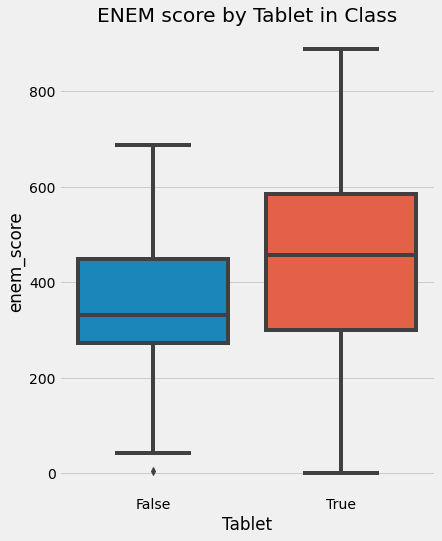

In [156]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

# 04 - Graphical Causal Models

https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html

> Imagine that with the help of some miracle you are finally able to randomize education in order to measure its effect on wage. But just to be sure you won’t have confounding, you control for a lot of variables. Among them, you control for investments. But investment is not a common cause of education and wage. Instead, it is a consequence of both. More educated people both earn more and invest more. Also, those who earn more invest more. **Since investment is a collider, by conditioning on it, you are opening a second path between the treatment and the outcome, which will make it harder to measure the direct effect.** One way to think about this is that by controlling investments, you are looking at **small groups of the population where investment is the same and then finding the effect of education on those groups**. But by doing so, **you are also indirectly and inadvertently not allowing wages to change much**. As a result, you **won’t be able to see how education changes wage, because you are not allowing wages to change as it should**.

> A similar thing happens when we condition on a mediator of the treatment. **A mediator is a variable between the treatment and the outcome. It, well, mediates the causal effect.** For example, suppose again you are able to randomize education. But, just to be sure, you decide to control whether or not the person had a white collar job. Once again, this conditioning biasses the causal effect estimation. This time, not because it opens a front door path with a collider, but because it closes one of the channels through which the treatment operates. In our example, *getting a white collar job is one way that more education leads to higher pay*. By controlling it, we close this channel and leave open only the direct effect of education on wage.

# 05 - The Unreasonable Effectiveness of Linear Regression

https://matheusfacure.github.io/python-causality-handbook/05-The-Unreasonable-Effectiveness-of-Linear-Regression.html

> Now, back to our question, is the parameter we’ve estimated for the impact of educ on wage causal? I’m sorry to bring it to you, **but that will depend on our ability to argue in favor or against that fact that all confounders have been included in the model**. Personally, I think they haven’t. For instance, we haven’t included *family wealth*. Even if we included family education, that can only be seen as a proxy for wealth. We’ve also not accounted for factors like personal ambition. It could be that ambition is what causes both more years of education and higher wage, so it is a confounder. This is to show that causal inference with non-random or observational data should always be taken with a grain of salt. We can never be sure that all confounders were accounted for.

# 07 - Beyond Confounders

https://matheusfacure.github.io/python-causality-handbook/07-Beyond-Confounders.html

## Good Controls

https://matheusfacure.github.io/python-causality-handbook/07-Beyond-Confounders.html#good-controls

> Sadly, the estimated ATE is -0.62, which is pretty weird. How can sending an email make late customers pay less than average? Still, the P-value is so high that this probably doesn’t mean anything. What you should do now? Go back to your team with a tail between your legs and say that the test is inconclusive and you need more data? Not so fast.

> First, let’s understand why we can fail to find statistical significance in a treatment even when it is there. **It could be that, like in this case, the treatment has very little impact on the outcome**. If you think about it, what makes people pay their debt is, by and large, *factors outside the control of the collections department*. People pay their debt because they find a new job, manage their finances, income and so on. In statistical terms, we can say that the variability of payments is explained much more by other factors other than by the email.

> Fortunately, **regression can help us lower this variability**. The trick is to use **additional controls**. If a variable is a good predictor of the outcome, it will explain away a lot of its variance. If risk and credit limit are good predictors of payment, we can control them to make it easier to find the impact of the email on payments. If we remember how regression works, this has an intuitive explanation. Adding extra variables to a regression means keeping them constant while looking at the treatment. So, the reasoning goes, if we look at similar levels of risk and credit limit, the variance of the response variable payments should be smaller. Or, in other words, if risk and credit line predicts payments very well, customers with a similar risk and credit line should also have similar payment levels, hence with less variance.

> To wrap it up, anytime we have a control that is a good predictor of the outcome, even if it is not a confounder, adding it to our model is a good idea. It helps lowering the variance of our treatment effect estimates. 


## Mostly Harmful Controls

https://matheusfacure.github.io/python-causality-handbook/07-Beyond-Confounders.html#mostly-harmful-controls

> As a second motivating example, let’s consider a drug test scenario with `2` hospitals. Both of them are conducting **randomised** trials on a new drug to treat a certain illness. The outcome of interest is days hospitalised. If the treatment is effective, it will lower the amount of days the patient stays in the hospital. For one of the hospitals, the policy regarding the random `treatment` is to give it to `90%` of its patients while 10% get a placebo. The other hospital has a **different policy**: it gives the `drug` to a random `10%` of its patients and 90% get a placebo. You are also told that **the hospital that gives 90% of the true drug and 10% of placebo usually gets more severe cases of the illness to treat**.

> Since you are dealing with randomized data, your first instinct is to simply run a regression of the outcome on the treatment.

> But you find some **counterintuitive results**. How can the treatment be increasing the number of days in the hospital? The answer lies in the fact that we are running **2 different experiments**. **Severity is positively linked with more days at the hospital and since the hospital with more severe cases also gives more of the drug, the drug becomes positively correlated with more days at the hospital**.

>  In other words, `severity` acts as a **confounder**, determining the hospital the patient goes and, hence, the probability of receiving the drug.

> There are 2 ways of fixing that. The first one, which defeats the purpose of using data from both hospitals, is to simply look at the ATE in each hospital individually.

> The other approach, which leverages the power of regression, is to control for severity by including it in the model.

> Adding hospital on top of severity as a control introduced MORE variance to our ATE estimator. How can that be? The answer lies in the formula for the standard error of the regression coefficient.

> As to why including hospitals in the model increases the error of our estimate, it is because it is a good predictor of the treatment and not of the outcome (once we control for severity). So, by predicting the treatment, it effectively makes it so that it’s variance is lower! Once again, we can resort to partitioning our regression above into it’s 2 steps to see this.

> So the bottom line is that we should add controls that are both correlated with the treatment and the outcome (confounder), like the severity in the model above. We should also add controls that are good predictors of the **outcome** [not treatment, like hospital], even if they are not confounders, because they lower the variance of our estimates. However, we should **NOT** add controls that are **just** good predictors of the **treatment**, because they will **increase the variance of our estimates**.